In [92]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d_turbo'
run_name = 'et1'
#source_dir = '../data/'+system_name+'/'+run_name+'/'
#data_dir = '../data/'+system_name+'/'+run_name+'_eval/'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate

In [93]:
# READING THE ENVIRONMENTAL PARAMETERS
env_params = ut.read_params(data_dir+'param_env.txt')
for ep in env_params:
    print(ep, env_params[ep])
alg_params = ut.read_params(data_dir+'param_alg.txt')
for ep in alg_params:
    print(ep, alg_params[ep])
#eps = ut.p_law_burn(alg_params['n_steps'], alg_params['eps_burn'], alg_params['eps_expn'], alg_params['eps0'], alg_params['epsc'])

int_steps 0.001
ep_length 200.0
ep_length_eval 1000.0
decision_time 0.25
alphas [ 6.  8. 10. 12. 14. 16. 18. 20.]
CL_alphas [0.65 0.75 0.82 0.9  1.   1.08 1.1  1.05]
CD_alphas [0.05 0.07 0.09 0.1  0.13 0.18 0.18 0.21]
init_theta 0.7853981633974483
init_dtheta 0.0
init_alpha 7.0
beta_bins [-3.14159265 -2.6927937  -2.24399475 -1.7951958  -1.34639685 -0.8975979
 -0.44879895  0.          0.44879895  0.8975979   1.34639685  1.7951958
  2.24399475  2.6927937   3.14159265]
banks [-0.26179939 -0.20943951 -0.15707963 -0.10471976 -0.05235988  0.
  0.05235988  0.10471976  0.15707963  0.20943951  0.26179939]
init_bank 5.0
init_phi 0.0
init_dphi 0.0
wind_type turbo
wind_amplification 1.0
windv_file_dir ../data/kite3d_turbo/v/
windv_file_name velocities
windq_file_path ../data/kite3d_turbo/q.txt
start_frame 1000.0
alg_type et
lambda 0.9
gamma 1.0
n_steps 250000000.0
traj_points 200.0
eval_steps 20000.0
lr0 0.002
lrc 312500.0
lr_expn 0.8
lr_burn 166666666.66666666
eps0 0.005
epsc 1666666.6666666667
e

In [81]:
# WRITING THE EVALUATION PARAMETERS
#params = dict()
#params['alg_type'] = 'eval'
#params['quality_path'] = source_dir+'/best_quality.txt'
#params['ev_time'] = 3000 # sec
#params['n_steps'] = params['ev_time']/float(env_params['decision_time'])+1
#params['traj_points'] = params['n_steps']
#params['gamma'] = 1
#params['epsilon'] = 0
#params['epsilon'] = eps
#ut.write_params(params, data_dir, 'param_alg.txt')

#env_params['ep_length'] = params['ev_time']-1
#ut.write_params(env_params, data_dir, 'param_env.txt')

In [82]:
#p = subprocess.Popen(["./run.exe", system_name, run_name+'_eval'], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
#print(p.stderr.read().decode('utf-8'))

In [94]:
s_traj, s_head = ut.read_traj(data_dir + 'ev_states.txt')

In [95]:
xs = np.linspace(0, alg_params['eval_steps']*env_params['decision_time'], int(alg_params['eval_steps']))

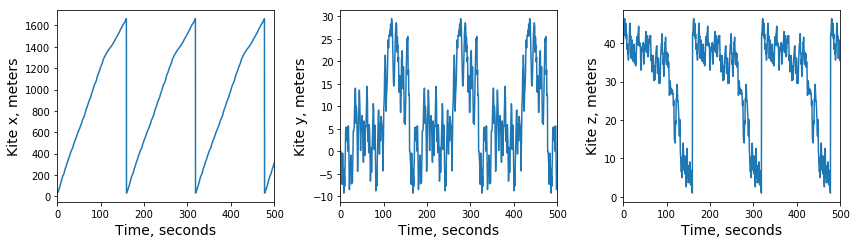

In [97]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,500]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, s_traj[:,0])

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, s_traj[:,1])

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, s_traj[:,2])

plt.tight_layout()
#plt.savefig(plot_dir+"eval_traj.png", dpi=200)

In [87]:
info_traj, labels = ut.read_traj(data_dir+'ev_info.txt')

In [88]:
labels

['state_index', 'state_descr', 'acion_index', 'action_decr', 'reward']

In [89]:
np.array(info_traj[:,4][:100], dtype=float)

array([1.60285 , 2.26433 , 2.4084  , 2.36394 , 2.28353 , 2.21314 ,
       2.16616 , 2.13638 , 2.11128 , 2.08297 , 2.04941 , 2.01144 ,
       1.97034 , 1.92703 , 1.88193 , 1.83519 , 1.78688 , 1.73713 ,
       1.68608 , 1.63398 , 1.58112 , 1.52783 , 1.47448 , 1.42144 ,
       1.3691  , 1.31785 , 1.26806 , 1.22007 , 1.17418 , 1.13066 ,
       1.0897  , 1.05144 , 1.01598 , 0.983333, 0.953486, 0.926369,
       0.901874, 0.879866, 0.860191, 0.842678, 0.827153, 0.813439,
       0.801364, 0.790761, 0.781475, 0.77336 , 0.766282, 0.760118,
       0.754759, 0.750106, 0.74607 , 0.742573, 0.739544, 0.736925,
       0.73466 , 0.732702, 0.731012, 0.729552, 0.728292, 0.727205,
       0.726268, 0.725459, 0.724762, 0.724161, 0.723643, 0.723197,
       0.722812, 0.722481, 0.722195, 0.721949, 0.721737, 0.721554,
       0.721397, 0.721262, 0.721145, 0.721044, 0.720958, 0.720883,
       0.720819, 0.720764, 0.720716, 0.720675, 0.72064 , 0.720609,
       0.720583, 0.720561, 0.720541, 0.720525, 0.72051 , 0.720

FileNotFoundError: [Errno 2] No such file or directory: '../plots/kite2d/et_rand_alp/eval_pol.png'

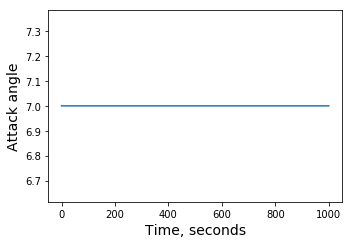

In [91]:
fig, (ax1) = plt.subplots(1,1, figsize=(5,3.5))
#x_wind = [0,200]

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Attack angle', fontsize=14)
#ax1.set_xlim(x_wind)
ax1.plot(xs, np.array(info_traj[:,0], dtype=float))

plt.tight_layout()
plt.savefig(plot_dir+"eval_pol.png", dpi=200)

In [ ]:

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

lim = [0,500]

ax1.set_xlim(lim)
ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, traj_x)

ax2.set_xlim(lim)
ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, traj_y)

ax3.set_xlim(lim)
ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite z, meters', fontsize=14)
ax3.plot(xs, traj_z)

plt.tight_layout()
#plt.savefig(plot_dir+"eval_traj.png", dpi=200)

In [19]:
beta_list = []
for i in range(len(env_params['beta_bins'])-1):
    beta_list.append((env_params['beta_bins'][i] + env_params['beta_bins'][i+1])/2.0)

In [20]:
def aggr_state_index_translator(index, n_betas, n_banks):
    beta = index % n_betas
    rest = index // n_betas
    bank = rest % n_banks
    alpha = rest // n_banks
    return beta, bank, alpha

In [21]:
beta_i, bank_i, alpha_i = aggr_state_index_translator(aggr_s_i_traj, len(env_params['beta_bins'])-1, len(env_params['banks']))
alphas = np.take(env_params['alphas'], alpha_i)
banks = np.take(env_params['banks'], bank_i)
betas = np.take(beta_list, beta_i)

FileNotFoundError: [Errno 2] No such file or directory: '../plots/kite2d/et1_a/eval_pol.png'

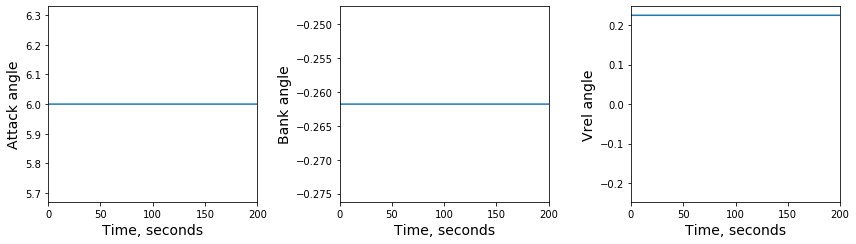

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))
x_wind = [0,200]

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Attack angle', fontsize=14)
ax1.set_xlim(x_wind)
ax1.plot(xs, alphas)

ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Bank angle', fontsize=14)
ax2.set_xlim(x_wind)
ax2.plot(xs, banks)

ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Vrel angle', fontsize=14)
ax3.set_xlim(x_wind)
ax3.plot(xs, betas)

plt.tight_layout()
plt.savefig(plot_dir+"eval_pol.png", dpi=200)
plt.show()

In [ ]:
def bins_from_list(l):
    bins = np.array([(l[i] + l[i+1])/2 for i in range(len(l)-1)])
    bins = np.append(2*l[0] - bins[0], bins)
    bins = np.append(bins, 2*l[-1] - bins[-1])
    return bins

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_ylabel('Counts', fontsize=14)
ax1.set_xlabel('Attack angle', fontsize=14)
bins = bins_from_list(env_params['alphas'])
ax1.set_xticks(env_params['alphas'])
ax1.hist(alphas, bins=bins, align='mid', rwidth=0.8)

ax2.set_ylabel('Counts', fontsize=14)
ax2.set_xlabel('Bank angle', fontsize=14)
bins = bins_from_list(env_params['banks'])
#ax2.set_xticks(env_params['banks'])
ax2.hist(banks, bins=bins, align='mid', rwidth=0.8)

ax3.set_ylabel('Counts', fontsize=14)
ax3.set_xlabel('Vrel angle', fontsize=14)
bins = bins_from_list(beta_list)
#ax2.set_xticks(env_params['banks'])
ax3.hist(betas, bins=bins, align='mid', rwidth=0.8)

plt.tight_layout()
plt.savefig(plot_dir+"aggr_states.png", dpi=200)
plt.show()